## Load the dataset

In [ ]:
# Reading the data
import pandas as pd
import numpy as np
import csv
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy import stats
import re

%matplotlib inline

test_data = pd.read_csv('../shelter-animal-outcomes/test.csv')
train_data = pd.read_csv('../shelter-animal-outcomes/train.csv')
sample_sub_data = pd.read_csv('../shelter-animal-outcomes/sample_submission.csv')


In [ ]:
print("Test dataset of shape %s: \n%s  " % (test_data.shape, ', '.join(test_data.columns)))
print("\nTrain dataset of shape %s: \n%s" % (train_data.shape, ', '.join(train_data.columns)))
train_data.head(1)


# Convert each column to a normalized format

In [ ]:
processedDF = pd.DataFrame() 

### The label Outcome
THe label is the outcome, which is defined in the outcomeType column and sometimes also specified with a OutcomeSubType


In [ ]:
## Preparing the plots

fig = plt.figure()
indexOfColumn = train_data.columns.get_loc('OutcomeType')

## Filling the plots with histograms and boxplots
outcomeTypeData = train_data.iloc[:, indexOfColumn]
ax = outcomeTypeData.value_counts().sort_values(axis='index').plot(kind='bar')

fig.suptitle('Histogram of attribute "{0}"'.format(train_data.columns[indexOfColumn]))

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()))


In [ ]:
## Preparing the plots

fig = plt.figure()
## Filling the plots with histograms and boxplots
ax = outcomeTypeData.value_counts().sort_values(axis='index').plot(kind='pie', autopct='%1.1f%%')

fig.suptitle('Histogram of attribute "{0}"'.format(train_data.columns[indexOfColumn]))



In [398]:
print(np.reshape(uniqueTypes[1], (1, 1)))

[['Euthanasia']]


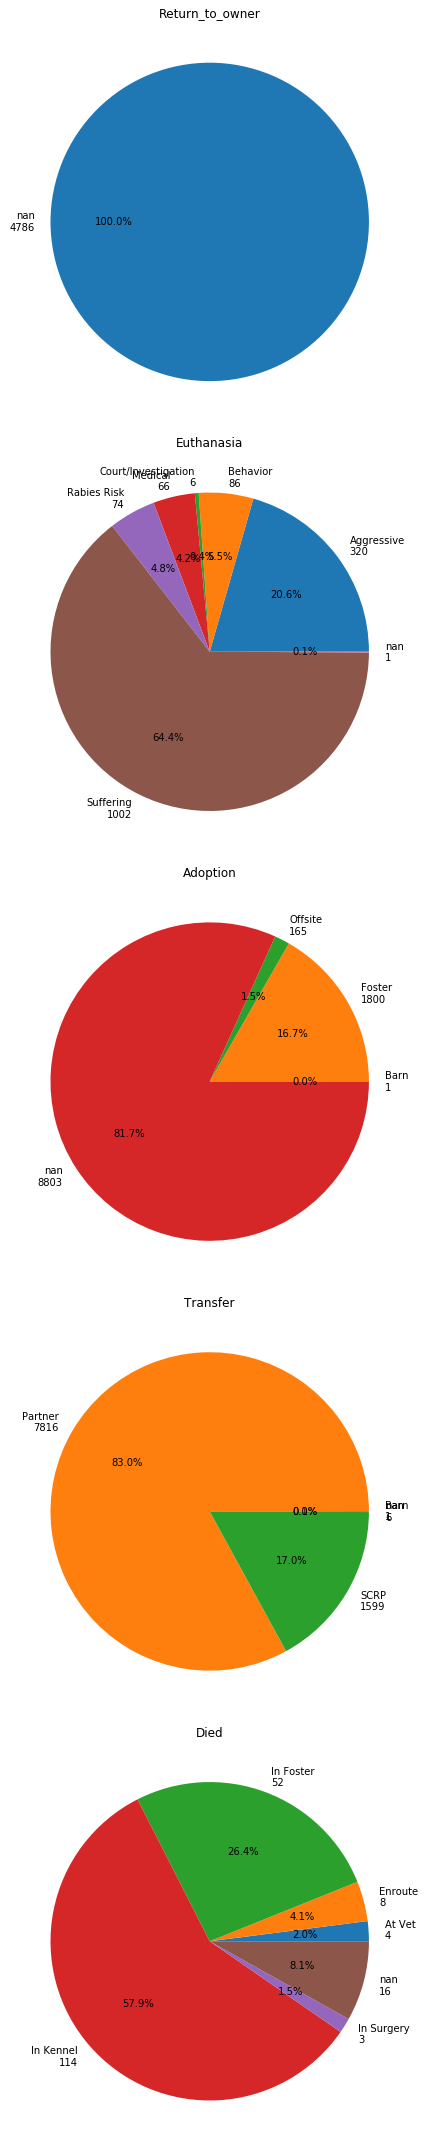

In [399]:
uniqueTypes = train_data.OutcomeType[:].unique()

def concat(row):
    print('-'.join(row.astype(str)))
    return '-'.join(row.astype(str))

fig_pie, ax_pie = plt.subplots(len(uniqueTypes),1, sharey='none', sharex='none',figsize=(30,30))
fig_pie.tight_layout() 
figCount = 0
for type in uniqueTypes:
    typeFilter = train_data['OutcomeType'].str.contains(type, flags=re.IGNORECASE, regex=True)
    subTypes = train_data['OutcomeSubtype'][typeFilter].astype('str')
    valueCounts = np.unique(subTypes, return_counts=True)
    labels = []
    for i in (range(len(valueCounts[0]))):
        labels.append('{0}\n{1}'.format(valueCounts[0][i], valueCounts[1][i]))    

    ax_pie[figCount].pie(valueCounts[1], labels= labels, autopct='%1.1f%%')
    ax_pie[figCount].set_title(type)

    #handles, labels = ax_pie[figCount].axes.get_legend_handles_labels()
    #ax_pie[figCount].legend(handles, labels )

    figCount = figCount + 1
    



## Get a clear view of unique values per column

In [252]:
uniqueValuesPerColumn = []

for i in range(len(train_data.columns)):
    columnmValues = train_data.iloc[:,i]
    uniques = columnmValues.value_counts()
    uniqueValuesPerColumn.append(uniques.size)
    print('Unique values of attribute "{0}": \t \t {1}'.format(train_data.columns[i], uniques.size))


Unique values of attribute "AnimalID": 	 	 26729
Unique values of attribute "Name": 	 	 6374
Unique values of attribute "DateTime": 	 	 22918
Unique values of attribute "OutcomeType": 	 	 5
Unique values of attribute "OutcomeSubtype": 	 	 16
Unique values of attribute "AnimalType": 	 	 2
Unique values of attribute "SexuponOutcome": 	 	 5
Unique values of attribute "AgeuponOutcome": 	 	 44
Unique values of attribute "Breed": 	 	 1380
Unique values of attribute "Color": 	 	 366


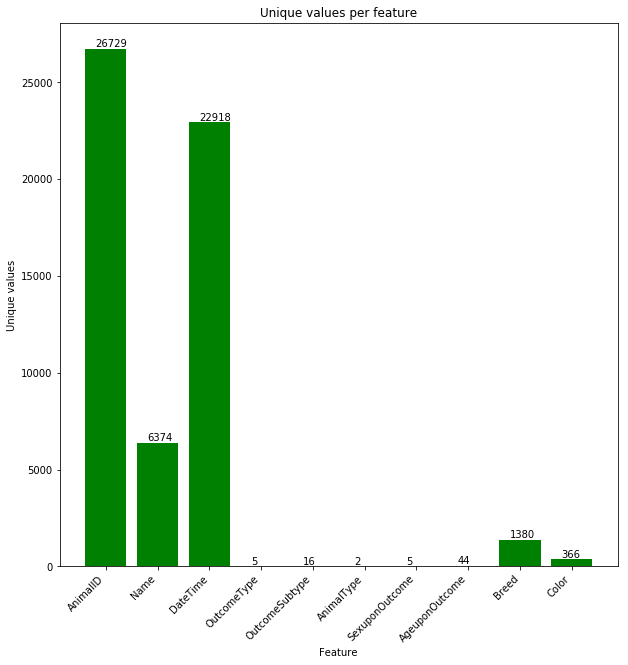

In [400]:
fig = plt.figure(figsize=(10,10))

x_pos = [i for i, _ in enumerate(uniqueValuesPerColumn)]
plt.bar(x_pos, uniqueValuesPerColumn, color='green')
plt.ylabel("Unique values")
plt.xlabel("Feature")
plt.title("Unique values per feature")

plt.xticks(x_pos, train_data.columns)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

ax = plt.gca()

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + 0.2, p.get_height() + 100))


plt.show()

The animal Id is useless in our case. The datetime contains the second most unique values, however this is an interval value and therefor unique values are no issue. The high cardinality of the nomanimal values of breed and color can be bigger issue.  

In [788]:
def dayPartOfArrivial(date):
    hour = date.split(' ')[1].split(':')[0]
    hour = int(hour)
    if (hour > 5) & (hour < 12):
        return 1
    elif (hour > 11) & (hour < 18):
        return 2
    elif (hour > 17) & (hour < 23):
        return 3
    else:
        return 0
    
def workingShifts(date):
    hour = date.split(' ')[1].split(':')[0]
    hour = int(hour)
    if (hour >= 9) & (hour < 17):
        return 1
    elif (hour >= 17) & (hour < 23):
        return 2
    elif (hour >= 0) & (hour < 9):
        return 0
    
def quarters(date):
    hour = date.split(' ')[1].split(':')[0]
    minutes = int(date.split(' ')[1].split(':')[1])
    value = (int(hour) )
    if(minutes >= 15 and minutes < 30 ):
        value = value + 0.25
    elif(minutes >= 30 and minutes < 45 ):
        value = value + 0.5
    elif(minutes >= 45 and minutes <= 59 ):
        value = value + 0.75
    return  value

def hours(date):
    hour = date.split(' ')[1].split(':')[0]
    return int(hour)

def minutes(date):
    hour = date.split(' ')[1].split(':')[0]
    minutes = date.split(' ')[1].split(':')[1]

    return int(hour) + int(minutes)/60

def updateToPercentage(row):
    newRow = pd.Series()
    newRow['Adoption'] = ((row['Adoption']/ row.sum())*100)
    newRow['Died'] = (row['Died']/ row.sum()*100)
    newRow['Return_to_owner'] = (row['Return_to_owner']/ row.sum()*100)
    newRow['Transfer'] = (row['Transfer']/ row.sum()*100)
    newRow['Euthanasia'] =  (row['Euthanasia']/ row.sum()*100)
    
    return newRow;

Text(0.5, 0, 'Time rounded to minutes')

<Figure size 1440x1440 with 0 Axes>

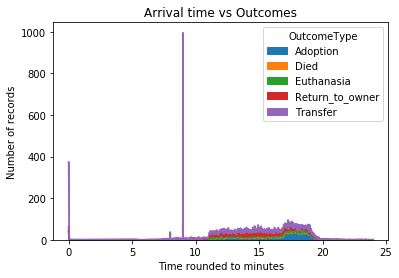

In [727]:
plt.figure(figsize=(20,20))
train_data['dayPart'] = train_data.DateTime.apply(minutes)
dayPart = train_data[['dayPart','OutcomeType']].groupby(['dayPart', 'OutcomeType']).size().unstack().fillna(0)
dayPart.plot(kind='area', title = 'Arrival time vs Outcomes', logy=False, logx=False)

plt.ylabel("Number of records")
plt.xlabel("Time rounded to minutes")

([<matplotlib.axis.XTick at 0x1eab601d668>,
 <a list of 24 Text xticklabel objects>)

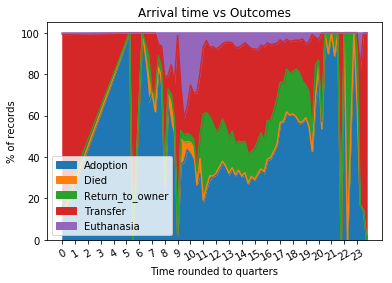

In [728]:
train_data['dayPart'] = train_data.DateTime.apply(quarters)
dayPart = train_data[['dayPart','OutcomeType']].groupby(['dayPart', 'OutcomeType']).size().unstack().fillna(0)
dayPart = dayPart.apply(updateToPercentage, axis=1, result_type='expand')

dayPart.plot(kind='area',rot=30, title = 'Arrival time vs Outcomes')
plt.ylabel("% of records")
plt.xlabel("Time rounded to quarters")
plt.xticks(range(24))

([<matplotlib.axis.XTick at 0x1ea899ac5f8>,
 <a list of 24 Text xticklabel objects>)

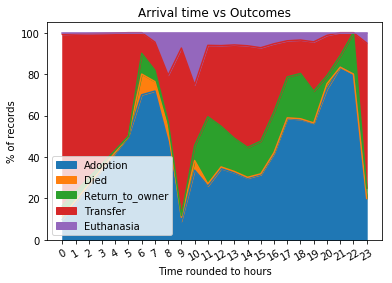

In [729]:
train_data['dayPart'] = train_data.DateTime.apply(hours)
dayPart = train_data[['dayPart','OutcomeType']].groupby(['dayPart', 'OutcomeType']).size().unstack().fillna(0)
dayPart = dayPart.apply(updateToPercentage, axis=1, result_type='expand')

dayPart.plot(kind='area',rot=30, title = 'Arrival time vs Outcomes')
ax = plt.gca()

plt.ylabel("% of records")
plt.xlabel("Time rounded to hours")

plt.xticks(range(24))

          Adoption      Died  Return_to_owner   Transfer  Euthanasia
dayPart                                                             
0.0      33.291771  3.865337         4.488778  49.625935     8.72818
1.0      31.028558  0.805783        17.484299  43.921081     6.76028
2.0      58.267804  0.332263        19.913612  17.687452     3.79887


[None, None, None, None, None, None]

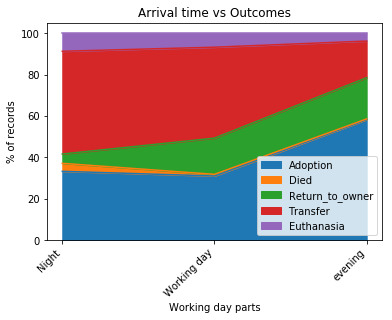

In [730]:
train_data['dayPart'] = train_data.DateTime.apply(workingShifts)

dayPart = train_data[['dayPart','OutcomeType']].groupby(['dayPart', 'OutcomeType']).size().unstack()
dayPart = dayPart.apply(updateToPercentage, axis=1, result_type='expand')
print(dayPart)
dayPart.plot(kind='area',rot=30, title = 'Arrival time vs Outcomes')

plt.ylabel("% of records")
plt.xlabel("Working day parts")

x_pos = [0, 1, 2]
plt.xticks(x_pos, ['Night','Working day', 'evening' ])
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')



          Adoption      Died  Return_to_owner   Transfer  Euthanasia
dayPart                                                             
0        10.500000  1.250000         5.250000  82.000000    1.000000
1        24.330842  2.194357        17.289607  46.804919    9.380275
2        39.820964  0.479353        17.741842  36.286457    5.671383
3        58.002877  0.369838        20.053421  17.875488    3.698377


[None, None, None, None, None, None, None, None]

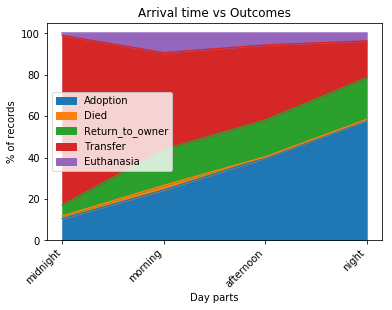

In [731]:
train_data['dayPart'] = train_data.DateTime.apply(dayPartOfArrivial)

dayPart = train_data[['dayPart','OutcomeType']].groupby(['dayPart', 'OutcomeType']).size().unstack()
dayPart = dayPart.apply(updateToPercentage, axis=1, result_type='expand')
print(dayPart)
dayPart.plot(kind='area',rot=30, title = 'Arrival time vs Outcomes')

plt.ylabel("% of records")
plt.xlabel("Day parts")

x_pos = [0, 1, 2, 3]

    
plt.xticks(x_pos, ['midnight', 'morning', 'afternoon' , 'night'])
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')



In [732]:
indexOfColumn = train_data.columns.get_loc('Breed')
noNanData = train_data.iloc[:, indexOfColumn]
uniqueBreeds = noNanData.value_counts()

numberOfOnceOcurringBreeds = uniqueBreeds.where(uniqueBreeds.values.astype('int') == 1).dropna()
numberOfOnlyFewOcurringBreeds = uniqueBreeds.where(uniqueBreeds.values.astype('int')< 100).dropna()
print(numberOfOnlyFewOcurringBreeds.size)
meanBreeds = uniqueBreeds.values.mean()
medianBreeds = uniqueBreeds.median()
print('There are {0} breeds that only occur once, that is a percentage of {1} of all breeds. \nEventhough, it is only {2} percent of the total dataset'.format(numberOfOnceOcurringBreeds.size, round(numberOfOnceOcurringBreeds.size / uniqueBreeds.size, 4)*100, round(numberOfOnceOcurringBreeds.values.sum()/ train_data.size, 4)*100))
print('The average number of datapoints per breed is {0}'.format(round(meanBreeds)))
print('And the median of datapoints per breed is {0}'.format(medianBreeds))

1353
There are 679 breeds that only occur once, that is a percentage of 49.2 of all breeds. 
Eventhough, it is only 0.21 percent of the total dataset
The average number of datapoints per breed is 19.0
And the median of datapoints per breed is 2.0


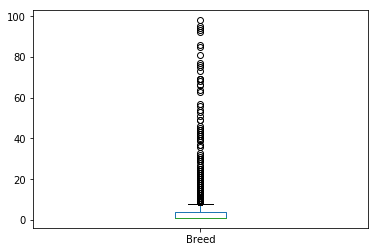

In [733]:
numberOfOnlyFewOcurringBreeds.plot.box()

Text(0.5, 0.98, 'Histogram of attribute "Breed"')

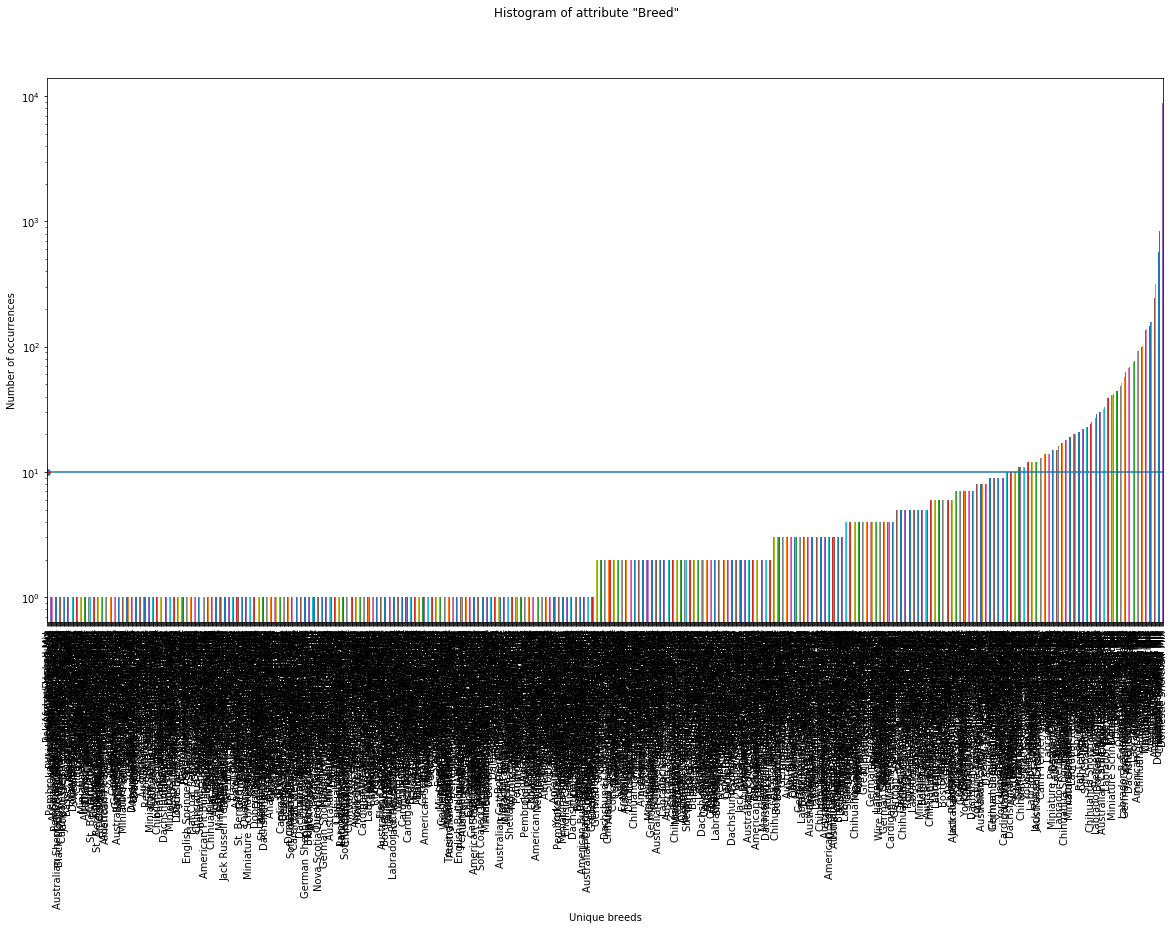

In [747]:
## Preparing the plots

fig = plt.figure(figsize=(20,10))
indexOfColumn = train_data.columns.get_loc('Breed')

## Filling the plots with histograms and boxplots
noNanData = train_data.iloc[:, indexOfColumn]
noNanData = noNanData.fillna("")
noNanData.value_counts().sort_values(axis='index').plot(kind='bar')
ax = plt.gca()

ax.set_yscale('log')
plt.ylabel("Number of occurrences")
plt.xlabel("Unique breeds")
x1, y1 = [0, 1400], [10, 10]
plt.plot(x1, y1, marker = 'o')
plt.plot(10, 'r+')  
fig.suptitle('Histogram of attribute "{0}"'.format(train_data.columns[indexOfColumn]))


## Processing mixed breeds

In [643]:
breedValues = train_data['Breed'].value_counts()
rareBreedValues = breedValues[breedValues ==1].index
for breed in  rareBreedValues[:50]:
    print(breed)

Pug/Pit Bull
Doberman Pinsch/Vizsla
Beagle/Chinese Sharpei
Maltese/Cocker Spaniel
Black Mouth Cur/Staffordshire
Great Pyrenees/German Shepherd
Harrier/Pointer
Boston Terrier/Beagle
German Shepherd/Black/Tan Hound
Jack Russell Terrier/American Staffordshire Terrier
Chihuahua Shorthair/Finnish Spitz
Italian Greyhound
Whippet/Chihuahua Shorthair
Patterdale Terr/Chihuahua Shorthair
Blue Lacy/Great Dane
Miniature Schnauzer/Labrador Retriever
Maltese/Papillon
Devon Rex Mix
Dachshund Longhair/Cairn Terrier
Doberman Pinsch/Rottweiler
Basset Hound/Beauceron
Standard Schnauzer/Toy Poodle
Pembroke Welsh Corgi/Pit Bull
Miniature Schnauzer/Soft Coated Wheaten Terrier
Collie Rough
Australian Cattle Dog/Collie Smooth
Queensland Heeler/Shetland Sheepdog
Rat Terrier/Pointer
Border Collie/Plott Hound
Spinone Italiano Mix
Maltese/Yorkshire
Papillon/Australian Cattle Dog
Mastiff/Labrador Retriever
German Shepherd/Australian Kelpie
St. Bernard Rough Coat/Labrador Retriever
German Shepherd/Akita
Australian 

We see that a lot of breeds that only occur once consists of multiple breeds seperated by a slash sign. Also some breeds also have the word 'Mix' in them. This hints to the fact that there are not a purebred, but the mixed breeds are not specified. 

In [644]:
breedValues = train_data['Breed'].value_counts()
mixedBreedValues = train_data['Breed'].str.contains('mix', flags=re.IGNORECASE, regex=True)
print(train_data['Breed'].size)
print(train_data['Breed'][mixedBreedValues].size)
print(train_data['Breed'][mixedBreedValues].value_counts()[:10])

26729
22298
Domestic Shorthair Mix       8810
Pit Bull Mix                 1906
Chihuahua Shorthair Mix      1766
Labrador Retriever Mix       1363
Domestic Medium Hair Mix      839
German Shepherd Mix           575
Domestic Longhair Mix         520
Siamese Mix                   389
Australian Cattle Dog Mix     367
Dachshund Mix                 318
Name: Breed, dtype: int64


## Filtering out inconsistent data
All the mixed breeds will be marked as a none purebred animal and the breed will be replaced by the named breed. We assume that the people who choose to adopt an animal will be influenced by the most present characteristics of a breed. 

In [645]:
processedDF['MixedBreed'] = mixedBreedValues
processedDF['Breed'] = train_data['Breed'].apply(lambda x : x.lower().replace('mix', '').strip())
processedDF.head(10)

,MixedBreed,Breed
0,True,shetland sheepdog
1,True,domestic shorthair
2,True,pit bull
3,True,domestic shorthair
4,False,lhasa apso/miniature poodle
5,False,cairn terrier/chihuahua shorthair
6,True,domestic shorthair
7,True,domestic shorthair
8,True,american pit bull terrier
9,False,cairn terrier


Now the mixed breeds are processed, however a lot of animals are labeled with two breeds. Because each animal needs two animals as parents, all breeds can be splitted into two columns. A purebred animal will have both parentcolumns filled with the same breed. The mixed breed animals will processed as one known parent breed and one unkown. However, that information is already in the mixedBreed column, so we won't insert any values in the breed2 column in these cases.

In [646]:
def checkForMaxTwoBreeds(columnVal):
    splittedBreed = columnVal.split('/') 
    
    if(len(splittedBreed) > 2):
        print('\nError, more slices found for value: {0}'.format(splittedBreed))
    
    if 'black/tan hound' in columnVal.lower():
        columnVal = columnVal.lower().replace('black/tan hound', 'black tan hound').strip()
        print('Fixed value {0} by replacing it with "{1}"'.format(splittedBreed, columnVal))
    
    return columnVal

processedDF['Breed'] = processedDF['Breed'].apply(checkForMaxTwoBreeds)


Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"
Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"

Error, more slices found for value: ['plott hound', 'black', 'tan hound']
Fixed value ['plott hound', 'black', 'tan hound'] by replacing it with "plott hound/black tan hound"
Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"
Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"

Error, more slices found for value: ['labrador retriever', 'black', 'tan hound']
Fixed value ['labrador retriever', 'black', 'tan hound'] by replacing it with "labrador retriever/black tan hound"
Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"

Error, more slices found for value: ['german shepherd', 'black', 'tan hound']
Fixed value ['german shepherd', 'black', 'tan hound'] by replacing it with "german shepherd/black tan hound"
Fixed value ['black', 'tan hound'] by replacing it with "black tan ho

In [647]:
def extractMultipleBreeds(row):
    splittedBreed = row['Breed'].split('/') 
    if(len(splittedBreed) > 2):
        print('Error, more slices found for value: {0}'.format(splittedBreed))
    elif len(splittedBreed) == 2:    
        row['Breed2'] = splittedBreed[1]
        row['Breed'] = splittedBreed[0]
    return row;

processedDF = processedDF.apply(extractMultipleBreeds, axis=1, result_type='expand')
processedDF.head(20)

,Breed,Breed2,MixedBreed
0,shetland sheepdog,NaN,True
1,domestic shorthair,NaN,True
2,pit bull,NaN,True
3,domestic shorthair,NaN,True
4,lhasa apso,miniature poodle,False
5,cairn terrier,chihuahua shorthair,False
6,domestic shorthair,NaN,True
7,domestic shorthair,NaN,True
8,american pit bull terrier,NaN,True
9,cairn terrier,NaN,False


In [648]:
print('Amount of unique unique second breeds for mixed breeds: {0}.'.format(processedDF['Breed2'].nunique()))
MultipleBreedsInBreed2 = processedDF['Breed2'].fillna(value = '').str.contains('/', flags=re.IGNORECASE, regex=True)
print('There are {0} rows that still contain multiple breeds.'.format(processedDF['Breed2'][MultipleBreedsInBreed2].size))

Amount of unique unique second breeds for mixed breeds: 141.
There are 0 rows that still contain multiple breeds.


In [649]:
breedUniques = processedDF['Breed'].value_counts()
singleDatapointBreeds = breedUniques.where(breedUniques.values.astype('int') == 1).dropna()
breedUniques2 = processedDF['Breed2'].value_counts()
singleDatapointBreeds2 = breedUniques2.where(breedUniques2.values.astype('int') == 1).dropna()

# using size property instead of the nunique() function because this prevents the unique function to be executed twice
# over the same column
print('There are {0} unique breeds of which {1} occur only in one datapoint.'.format(breedUniques.size, singleDatapointBreeds.size))
print('There are {0} unique cross breeds of which {1} occur only in one datapoint.'.format(breedUniques2.size, singleDatapointBreeds2.size))


There are 220 unique breeds of which 20 occur only in one datapoint.
There are 141 unique cross breeds of which 31 occur only in one datapoint.


Text(0.5, 0.98, 'Histogram of attribute "Breed"')

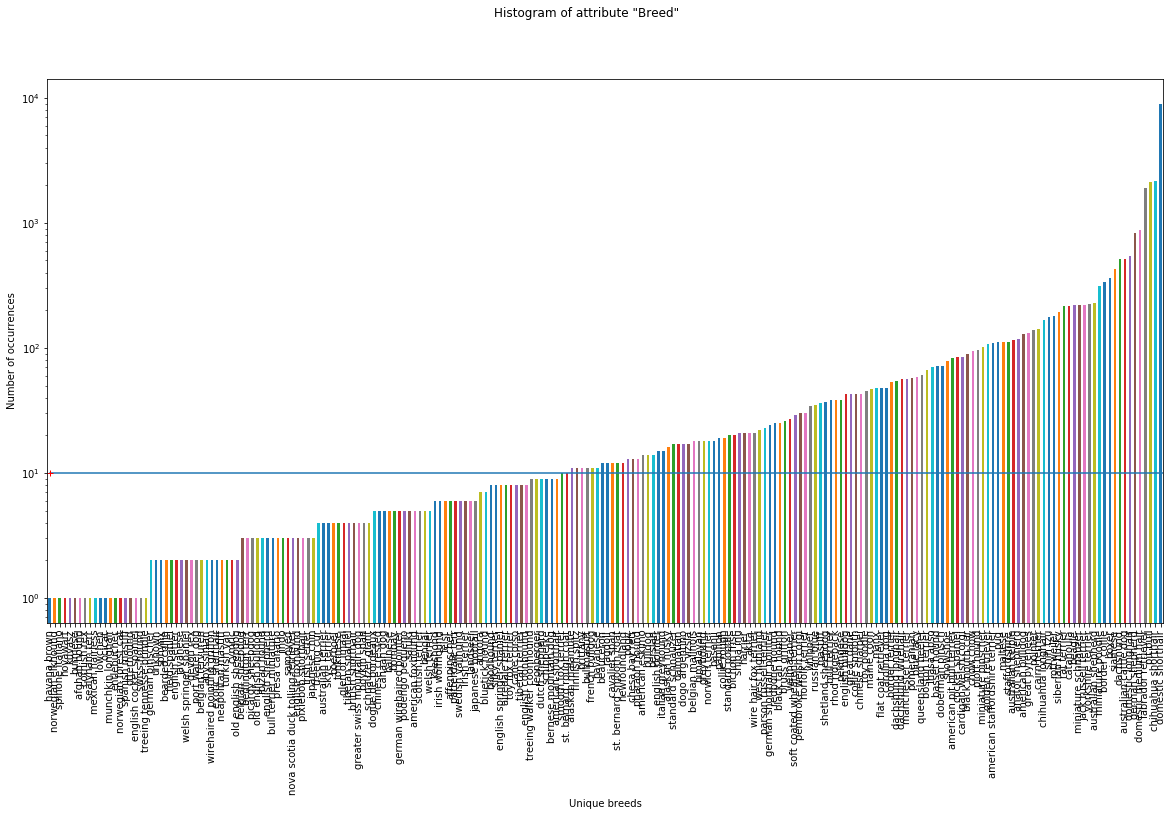

In [751]:
## Preparing the plots

fig = plt.figure(figsize=(20,10))
indexOfColumn = train_data.columns.get_loc('Breed')

## Filling the plots with histograms and boxplots
processedDF['Breed'].value_counts().sort_values(axis='index').plot(kind='bar')
ax = plt.gca()

ax.set_yscale('log')
plt.ylabel("Number of occurrences")
plt.xlabel("Unique breeds")
x1, y1 = [0, 1400], [10, 10]
plt.plot(x1, y1)
plt.plot(10, 'r+')  
fig.suptitle('Histogram of attribute "{0}"'.format(train_data.columns[indexOfColumn]))


## Breed preprocess rounding up
The dataset is now adjusted so the breed label is always the first named breed of the animal. In a new column, named Breed2, the animal breed is labled if it's mixed with specified breed. Each data point is extended with the label if it's a mixed breed.

## Convert cat and dog to binary form

In [650]:
print('Processing column "{0}"'.format(train_data.columns[5]))
print('The unique values in the column are: {0}'.format(train_data['AnimalType'].value_counts()))


processedDF['isCat'] = train_data['AnimalType'].str.startswith('C').astype('uint8')
print('Processed column "{0}"'.format(train_data.columns[5]))

processedDF.head()

Processing column "AnimalType"
The unique values in the column are: Dog    15595
Cat    11134
Name: AnimalType, dtype: int64
Processed column "AnimalType"


,Breed,Breed2,MixedBreed,isCat
0,shetland sheepdog,NaN,True,0
1,domestic shorthair,NaN,True,1
2,pit bull,NaN,True,0
3,domestic shorthair,NaN,True,1
4,lhasa apso,miniature poodle,False,0


## Process color values

In [651]:
indexOfColumnColor = train_data.columns.get_loc('Color')
noNanDataColor = train_data.iloc[:, indexOfColumnColor]
uniqueColor = noNanDataColor.value_counts()
numberOfOnceOcurringColors = uniqueColor.where(uniqueColor.values.astype('int') == 1).dropna()
numberOfOnlyFewOcurringColors = uniqueColor.where(uniqueColor.values.astype('int')< 100).dropna()
print(numberOfOnlyFewOcurringColors.size)
meanColors = uniqueColor.values.mean()
medianColors = uniqueColor.median()
print('There are {0} colors that only occur once, that is a percentage of {1} of all Colors. \nEventhough, it is only {2} percent of the total dataset'.format(numberOfOnceOcurringColors.size, round(numberOfOnceOcurringColors.size / uniqueColor.size, 4)*100, round(numberOfOnceOcurringColors.values.sum()/ train_data.size, 4)*100))
print('The average number of datapoints per breed is {0}'.format(round(meanColors)))
print('And the median of datapoints per breed is {0}'.format(medianColors))

324
There are 119 colors that only occur once, that is a percentage of 32.51 of all Colors. 
Eventhough, it is only 0.04 percent of the total dataset
The average number of datapoints per breed is 73.0
And the median of datapoints per breed is 3.0


Let's see if we can see if the data is in a standard format.

In [652]:

firstWordArray = np.array([])
secondWordArray = np.array([])

for val in uniqueColor.index:
    doubleColors = val.split('/') 
    for color in doubleColors:
        colorSplits = color.split(' ')
        firstWordArray = np.append(firstWordArray, colorSplits[0])
        if(len(colorSplits) == 2):
            secondWordArray = np.append(secondWordArray, colorSplits[1])
        
print(np.unique(firstWordArray))

print(np.unique(secondWordArray))
print()
print('There are {0} unique colors in the dataset'.format(uniqueColor.size))

print('It looks like that all double colors are seperated with a / \n{0} \n'.format(noNanDataColor[noNanDataColor.str.contains('/', flags=re.IGNORECASE, regex=True)][:10]))

print('And some colors are extended with the color pattern by a space followed by the pattern : \n{0} \n'.format(noNanDataColor[noNanDataColor.str.contains(' ', flags=re.IGNORECASE, regex=True)][:10]))

print('If we extract these values we have only {0} unique colors and {1} unique color patterns'.format(len(np.unique(firstWordArray)), len(np.unique(secondWordArray))))

#.contains('/', flags=re.IGNORECASE, regex=True)

['Agouti' 'Apricot' 'Black' 'Blue' 'Brown' 'Buff' 'Calico' 'Chocolate'
 'Cream' 'Fawn' 'Flame' 'Gold' 'Gray' 'Lilac' 'Liver' 'Lynx' 'Orange'
 'Pink' 'Red' 'Ruddy' 'Sable' 'Seal' 'Silver' 'Tan' 'Torbie' 'Tortie'
 'Tricolor' 'White' 'Yellow']
['Brindle' 'Cream' 'Merle' 'Point' 'Smoke' 'Tabby' 'Tick' 'Tiger']

There are 366 unique colors in the dataset
It looks like that all double colors are seperated with a / 
0             Brown/White
2              Blue/White
5               Black/Tan
8               Red/White
13              Black/Red
14            White/Cream
15     Orange Tabby/White
17            Brown/White
20            Black/White
22    Brown Brindle/White
Name: Color, dtype: object 

And some colors are extended with the color pattern by a space followed by the pattern : 
1             Cream Tabby
3              Blue Cream
6              Blue Tabby
7             Brown Tabby
15     Orange Tabby/White
16            Brown Tabby
22    Brown Brindle/White
25           Orange Tabby


In [653]:
def extractMultipleColorsAndTypes(row):
    colorRow = pd.Series() 
    colorRow['Color'] = None
    colorRow['ColorPattern'] = None
    colorRow['Color2'] = None
    colorRow['ColorPattern2'] = None

    splittedColors = row['Color'].split('/') 
    
    if len(splittedColors) >= 1:
        colorPattern = splittedColors[0].split(' ')
        colorRow['Color'] = colorPattern[0]
        if(len(colorPattern) >= 2):
            colorRow['ColorPattern'] = colorPattern[1]
            
    if len(splittedColors) >= 2:
        colorPattern = splittedColors[1].split(' ')
        colorRow['Color2'] = colorPattern[0]
        if(len(colorPattern) >= 2):
            if( colorRow['ColorPattern'] != None and str(colorRow['ColorPattern']) != colorPattern[1]):
                print('Multiple color patterns on same animal detected {0}'.format(splittedColors))
            colorRow['ColorPattern2'] = colorPattern[1]

    return colorRow;

newSeries = train_data.apply(extractMultipleColorsAndTypes, axis=1, result_type='expand')
newSeries.head(20)

Multiple color patterns on same animal detected ['Brown Brindle', 'Red Tick']
Multiple color patterns on same animal detected ['Blue Cream', 'Blue Tiger']
Multiple color patterns on same animal detected ['Blue Tabby', 'Blue Cream']
Multiple color patterns on same animal detected ['Black Smoke', 'Brown Tabby']
Multiple color patterns on same animal detected ['Red Tick', 'Brown Merle']
Multiple color patterns on same animal detected ['Lynx Point', 'Brown Tabby']
Multiple color patterns on same animal detected ['Brown Brindle', 'Brown Merle']
Multiple color patterns on same animal detected ['Brown Brindle', 'Red Tick']
Multiple color patterns on same animal detected ['Brown Brindle', 'Blue Tick']
Multiple color patterns on same animal detected ['Blue Tick', 'Brown Brindle']
Multiple color patterns on same animal detected ['Lynx Point', 'Gray Tabby']
Multiple color patterns on same animal detected ['Brown Brindle', 'Red Tick']
Multiple color patterns on same animal detected ['Brown Brindle

,Color,ColorPattern,Color2,ColorPattern2
0,Brown,None,White,None
1,Cream,Tabby,None,None
2,Blue,None,White,None
3,Blue,Cream,None,None
4,Tan,None,None,None
5,Black,None,Tan,None
6,Blue,Tabby,None,None
7,Brown,Tabby,None,None
8,Red,None,White,None
9,White,None,None,None


In [654]:
#train_data['Color'].head(10)
#print(newSeries['ColorPattern'.size)
processedDF = pd.concat([processedDF,newSeries], axis=1)
processedDF.head(10)

,Breed,Breed2,MixedBreed,isCat,Color,ColorPattern,Color2,ColorPattern2
0,shetland sheepdog,NaN,True,0,Brown,None,White,None
1,domestic shorthair,NaN,True,1,Cream,Tabby,None,None
2,pit bull,NaN,True,0,Blue,None,White,None
3,domestic shorthair,NaN,True,1,Blue,Cream,None,None
4,lhasa apso,miniature poodle,False,0,Tan,None,None,None
5,cairn terrier,chihuahua shorthair,False,0,Black,None,Tan,None
6,domestic shorthair,NaN,True,1,Blue,Tabby,None,None
7,domestic shorthair,NaN,True,1,Brown,Tabby,None,None
8,american pit bull terrier,NaN,True,0,Red,None,White,None
9,cairn terrier,NaN,False,0,White,None,None,None


In [769]:
colors = pd.concat([newSeries['ColorPattern'], newSeries['ColorPattern2']], ignore_index=True)
uniqueColor = colors.value_counts()
numberOfOnceOcurringColors = uniqueColor.where(uniqueColor.values.astype('int') == 1).dropna()
numberOfOnlyFewOcurringColors = uniqueColor.where(uniqueColor.values.astype('int')< 100).dropna()
print(numberOfOnlyFewOcurringColors.size)
meanColors = uniqueColor.values.mean()
medianColors = uniqueColor.median()
print('There are {0} patterns that only occur once, that is a percentage of {1} of all patterns. \nEventhough, it is only {2} percent of the total dataset'.format(numberOfOnceOcurringColors.size, round(numberOfOnceOcurringColors.size / uniqueColor.size, 4)*100, round(numberOfOnceOcurringColors.values.sum()/ train_data.size, 4)*100))
print('The average number of datapoints per breed is {0}'.format(round(meanColors)))
print('And the median of datapoints per breed is {0}'.format(medianColors))

4
There are 0 patterns that only occur once, that is a percentage of 0.0 of all patterns. 
Eventhough, it is only 0.0 percent of the total dataset
The average number of datapoints per breed is 819.0
And the median of datapoints per breed is 117.0


In [770]:
colors = pd.concat([newSeries['Color'], newSeries['Color2']], ignore_index=True)
uniqueColor = colors.value_counts()
numberOfOnceOcurringColors = uniqueColor.where(uniqueColor.values.astype('int') == 1).dropna()
numberOfOnlyFewOcurringColors = uniqueColor.where(uniqueColor.values.astype('int')< 100).dropna()
print(numberOfOnlyFewOcurringColors.size)
meanColors = uniqueColor.values.mean()
medianColors = uniqueColor.median()
print('There are {0} colors that only occur once, that is a percentage of {1} of all Colors. \nEventhough, it is only {2} percent of the total dataset'.format(numberOfOnceOcurringColors.size, round(numberOfOnceOcurringColors.size / uniqueColor.size, 4)*100, round(numberOfOnceOcurringColors.values.sum()/ train_data.size, 4)*100))
print('The average number of datapoints per breed is {0}'.format(round(meanColors)))
print('And the median of datapoints per breed is {0}'.format(medianColors))

8
There are 1 colors that only occur once, that is a percentage of 3.45 of all Colors. 
Eventhough, it is only 0.0 percent of the total dataset
The average number of datapoints per breed is 1402.0
And the median of datapoints per breed is 328.0


In [773]:


for index, row in train_data['AgeuponOutcome'].iteritems():
    ageInDays = np.nan;
    if isinstance(row, str):
        ageInDays = 0;
        [value, ageType] = row.split(" ")
        #print(ageType)
        ## Get rid of the s in days, weeks etc. because some ageTypes are written without s in the dataset...
        if 'day' in ageType.lower():
            ageInDays += int(value)
        if 'week' in ageType.lower():
            ageInDays += int(value)*7
        if 'month' in ageType.lower():
             ageInDays += int(value)* round(365/12)
        if 'year' in ageType.lower():
            ageInDays += int(value) * 365        

    tempArray[index] = ageInDays

processedDF['AgeuponOutcome'] = tempArray


In [775]:
print(len(processedDF['AgeuponOutcome'].value_counts()))

43


In [658]:
print(tempArray)

[[ 365.]
 [ 365.]
 [ 730.]
 ...
 [1460.]
 [  28.]
 [ 365.]]


There are 0 names that only occur once of the 6374 unique names.
0.6261374333228742


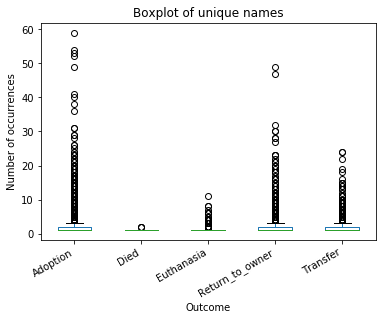

In [719]:
names = train_data[['Name','OutcomeType']].groupby([ 'Name', 'OutcomeType']).size().unstack()

countSingleOccurrence = 0
for name in names.itertuples():
    if sum(name[1:]) == 1:
        countSingleOccurrence = countSingleOccurrence + 1
        
names.plot.box( title='Boxplot of unique names')
plt.setp(plt.gca().get_xticklabels(), rotation=30, horizontalalignment='right')

plt.ylabel("Number of occurrences")
plt.xlabel("Outcome")
print('There are {0} names that only occur once of the {1} unique names.'.format(countSingleOccurrence, len(names)))
print(3991 /6374)


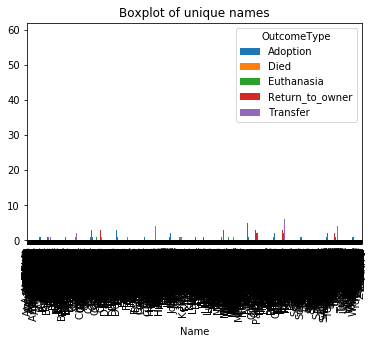

In [702]:
names.plot.bar( title='Boxplot of unique names')


There are 0 names that only occur once of the 2 unique names.
               Adoption      Died  Return_to_owner   Transfer  Euthanasia
isNameFilled                                                             
False         21.817709  1.560265         1.989338  64.035886   10.596801
True          47.751865  0.404454        24.335539  23.621179    3.886963


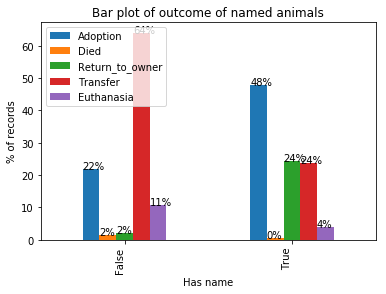

In [735]:
train_data['isNameFilled'] = np.invert(train_data['Name'].isnull())
names = train_data[['isNameFilled','OutcomeType']].groupby(['isNameFilled', 'OutcomeType']).size().unstack().fillna(0)
names = names.apply(updateToPercentage, axis=1, result_type='expand')

print('There are {0} names that only occur once of the {1} unique names.'.format(countSingleOccurrence, len(names)))
print(names)

names.plot.bar( title='Bar plot of outcome of named animals')

plt.ylabel("% of records")
plt.xlabel("Has name")
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')

ax = plt.gca()
ax.legend(loc='upper left')
for p in ax.patches:
    ax.annotate("%.0f" % (p.get_height())+'%', (p.get_x(), p.get_height()+ 0.005 ))

There are 0 names that only occur once of the 2 unique names.
OutcomeType   Adoption  Died  Euthanasia  Return_to_owner  Transfer
isNameFilled                                                       
False             1678   120         815              153      4925
True              9091    77         740             4633      4497


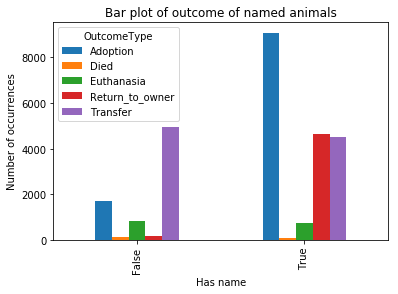

In [736]:
train_data['isNameFilled'] = np.invert(train_data['Name'].isnull())
names = train_data[['isNameFilled','OutcomeType']].groupby(['isNameFilled', 'OutcomeType']).size().unstack().fillna(0)
names.plot.bar( title='Bar plot of outcome of named animals')

plt.ylabel("Number of occurrences")
plt.xlabel("Has name")
print('There are {0} names that only occur once of the {1} unique names.'.format(countSingleOccurrence, len(names)))
print(names)

                 Adoption      Died  Return_to_owner   Transfer  Euthanasia
SexuponOutcome                                                             
Intact Female    5.781829  1.594987         8.573056  72.628881   11.421248
Intact Male      4.482270  2.241135        13.531915  66.212766   13.531915
Neutered Male   53.400143  0.194294        22.977810  19.910011    3.517742
Spayed Female   58.798186  0.204082        19.818594  18.548753    2.630385
Unknown          0.000000  2.287283         1.097896  87.374199    9.240622


[None, None, None, None, None, None, None, None, None, None]

<Figure size 1440x1440 with 0 Axes>

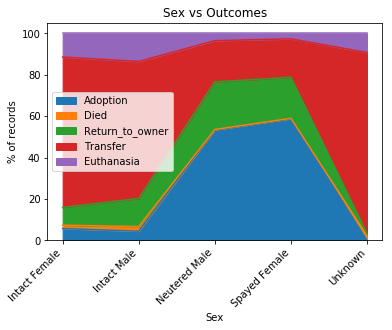

In [797]:


plt.figure(figsize=(20,20))
#train_data['dayPart'] = train_data.DateTime.apply(minutes)
sexUponOutcome = train_data[['SexuponOutcome','OutcomeType']].groupby(['SexuponOutcome', 'OutcomeType']).size().unstack().fillna(0)
sexUponOutcome = sexUponOutcome.apply(updateToPercentage, axis=1, result_type='expand')

print(sexUponOutcome)
sexUponOutcome.plot(kind='area', title = 'Sex vs Outcomes', logy=False, logx=False)

plt.ylabel("% of records")
plt.xlabel("Sex")

x_pos = [0, 1, 2, 3, 4]

    
plt.xticks(x_pos, sexUponOutcome.index)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')



In [26]:
processedDF['OutcomeType'] = train_data['OutcomeType']
processedDF['SexuponOutcome'] = train_data['SexuponOutcome']

processedDF['Name'] = np.invert(train_data['Name'].isnull())
processedDF.head()


,Breed,Breed2,MixedBreed,isCat,Color,ColorPattern,Color2,ColorPattern2,AgeuponOutcome,OutcomeType,SexuponOutcome,Name
0,shetland sheepdog,NaN,True,0,Brown,None,White,None,365.0,Return_to_owner,Neutered Male,True
1,domestic shorthair,NaN,True,1,Cream,Tabby,None,None,365.0,Euthanasia,Spayed Female,True
2,pit bull,NaN,True,0,Blue,None,White,None,730.0,Adoption,Neutered Male,True
3,domestic shorthair,NaN,True,1,Blue,Cream,None,None,21.0,Transfer,Intact Male,False
4,lhasa apso,miniature poodle,False,0,Tan,None,None,None,730.0,Transfer,Neutered Male,False


# Write to file

In [27]:
 processedDF.to_csv('../Datasets/preprocessed_dataset.csv')
